<a href="https://colab.research.google.com/github/sraeisi/MachineLearning_Physics/blob/master/Lec_7/Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from urllib.request import urlopen
from scipy.misc import imread

import cv2 
import os


import warnings
warnings.filterwarnings('ignore')

img_size = 50



# Convolution Operation for Image Processing

Here we go through one of the useful tools in the field of image processing that makes the building block for some of the most powerful neural networks. 

I should note that this is not specific to image processing and is well-known in probability, signal processing and may other fields. 

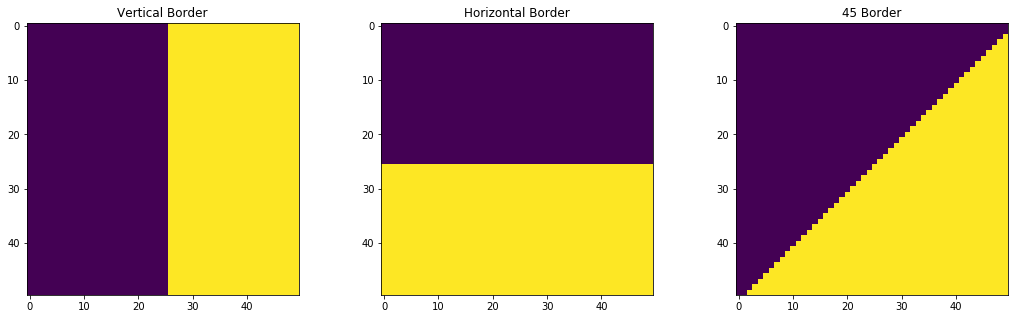

In [11]:
# Take these data z = f(x,y)
## Sometimes, we are looking for universal feaetures that 
## are invariant under translation or scaling. 


z_v = np.array([ [i>img_size/2 for i in range(img_size) ] for j in range(img_size) ] )
z_h = np.array([ [j>img_size/2 for i in range(img_size) ] for j in range(img_size) ] )
z_45 = np.array([ [j+i>img_size for i in range(img_size) ] for j in range(img_size) ] )
z_list = [z_v, z_h, z_45]
z_titles = ['Vertical Border','Horizontal Border','45 Border']

fig = plt.figure(figsize=(18, 5))
for i in range(3):
  ax = fig.add_subplot(1,3,i+1, title = z_titles[i])
  ax.imshow(z_list[i])


Convolution and using kernels is one of the well-known techniques for identifying these properties. 

In [0]:
kern_v = np.array([ [1,0,-1],[1,0,-1], [1,0,-1] ])
kern_h = kern_v.T
kern_45 = np.array([ [1,1,0],[1,0,-1], [0,-1,-1] ])
kern_list = [kern_v, kern_h, kern_45]
kern_titles = ['Vertical filter','Horizontal filter','45 filter']

In [0]:
from scipy import ndimage

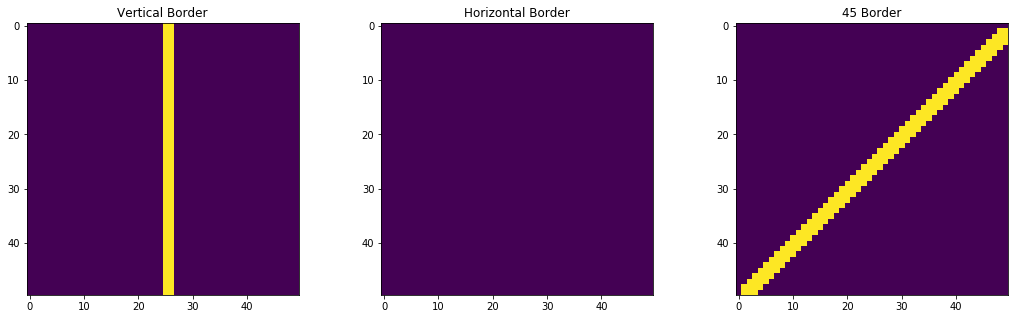

In [14]:
fig = plt.figure(figsize=(18, 5))
for i in range(3):
  ax = fig.add_subplot(1,3,i+1, title = z_titles[i])
  ax.imshow(ndimage.convolve(z_list[i], kern_v))

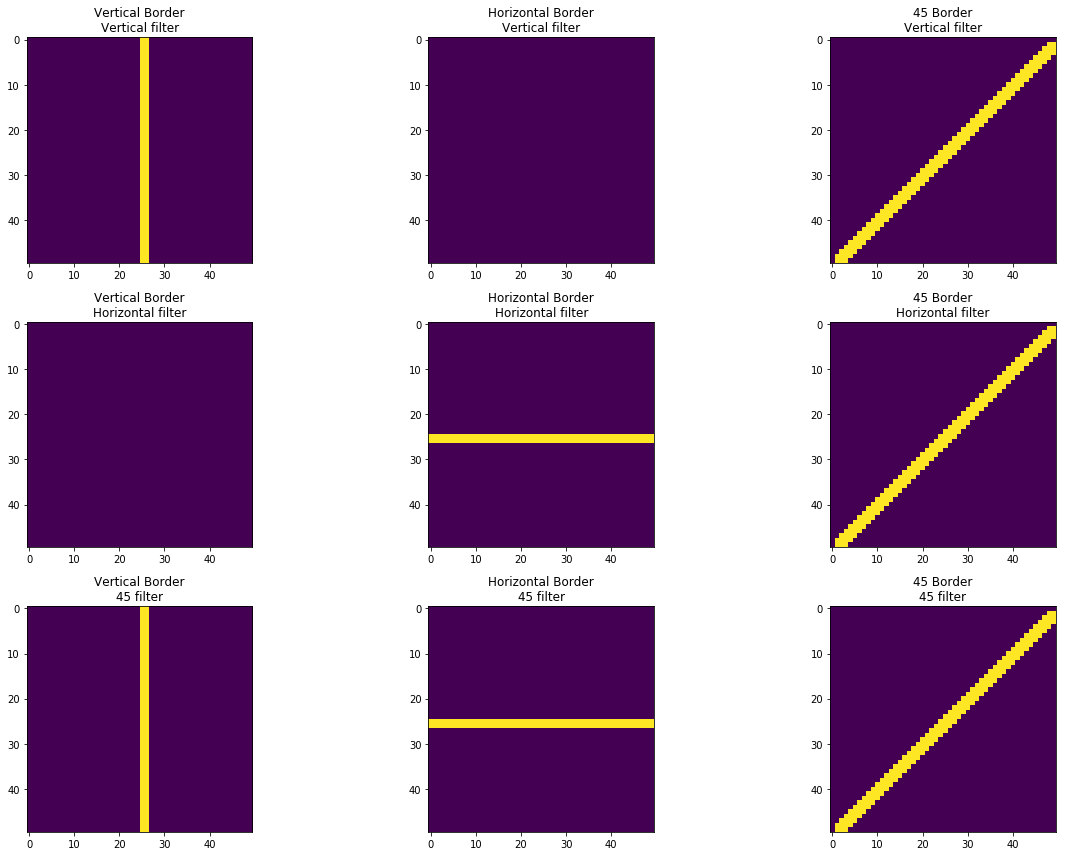

In [22]:
fig = plt.figure(figsize=(18, 12))
for i in range(3):
  for j in range(3):
    ax = fig.add_subplot(3,3,i+3*j+1, title = z_titles[i]+'\n'+kern_titles[j])
    ax.imshow(ndimage.convolve(z_list[i], kern_list[j]))
    
plt.tight_layout()
plt.show()

In [0]:
'''
Here's a simple code for convolution operation for images. 
It take in input the original image and the filter and 
returns the convoluted image. 
'''
def conv(image, kern):
  n_v, n_h = image.shape
  filt_v, filt_h = kern.shape
  n_out_v = n_v - filt_v +1
  n_out_h = n_h - filt_h +1
  
  output = np.zeros((n_out_v,n_out_h))
  
  for i in range(n_out_v):
    for j in range(n_out_h):
      x  = image[ i : i+filt_v , j : j+filt_h ]
      output[i,j] = np.sum(x*kern)
      
  return output

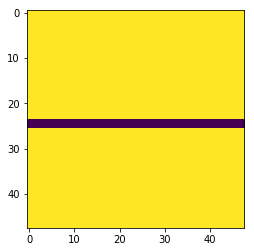

In [67]:
test = conv(z_h, kern_h)
# print(test.shape)
plt.imshow(test)
# test

(900, 900)


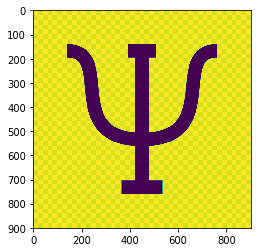

In [71]:
url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Lec_6/PSI.jpg'

with urlopen(url) as file:
    image = imread(file, 0)
    
print(image.shape)    
plt.imshow(image)    

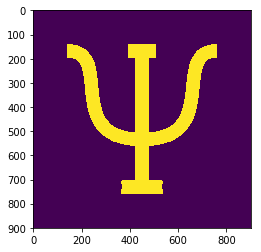

In [95]:
ref_image = image.copy()
ref_image[np.where( image>150 )  ] = 0
ref_image[np.where( image<=150 )  ] = 1
plt.imshow(ref_image)

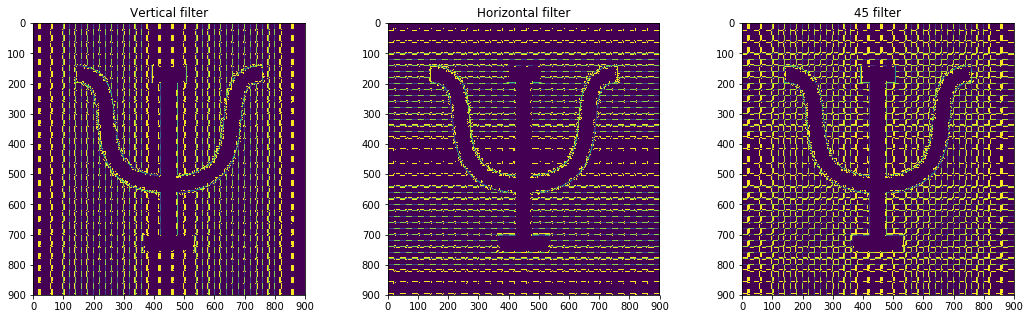

In [98]:
titles = ['Vertical Border','Horizontal Border','45 Border']

fig = plt.figure(figsize=(18, 5))
for i in range(3):
  ax = fig.add_subplot(1,3,i+1, title = kern_titles[i])
  ax.imshow(ndimage.convolve(image, kern_list[i]))

# Galaxy Zoo image classifiation

The data here is take from the Galaxy Zoo II survey. For detailed information, see

https://arxiv.org/pdf/1308.3496.pdf

The labels are more involved. Here I simplified the classification problem in the sense that the labels here are only the answers to the first question in the survey, i.e. Is the galaxy simply smooth, and rounded, with no sign of a disk? 

answers: 

1. smooth, 

2. features or disk, 

3. star or artifact).

In [106]:
import io, requests, zipfile
import pandas as pd

url_x = "https://www.dropbox.com/s/optw30o55q6mxlw/Cropped%26resized_GS_100_10000_withlabels.npz?dl=1"
url_y = 'https://www.dropbox.com/s/ctjjap42qilhu9s/Y_1.csv?dl=1'

### This file contains classes and the ids. 
s=requests.get(url_y, stream=True).content
df = pd.read_csv(io.BytesIO(s), index_col=0) 

### This file contains images and the ids. 
s=requests.get(url_x, stream=True).content
# d = np.load(io.BytesIO(s))
X, ids = [np.load(io.BytesIO(s))[f] for f in ['imgs','ids']]
ids = ids.astype('float')

### We can make the labels based on the ids in the X file.
Y = df.loc[ids].values
print(Y.shape)

(10000, 3)


In [108]:
# Each label is the probability of the image belonging to one of the three classes. 

Y[0]

array([0.383147, 0.616853, 0.      ])

In [0]:
### Find a classifier for this and evaluate it.